# **Forecasting Greenhouse Gases Emission from Agricultural Land**
> A time series data analysis project

<img src="../00_resources/main.jpg" alt="Image" style="width: 100%; max-width: 600px; height: auto;">

<h1 style="font-family: 'poppins'; font-weight: bold; color: Orange;">👨‍💻Author: </h1>
<h2 style="font-family: 'poppins'; font-weight: bold; color: Orange;">Dr. Muhammad Aamamr Tufail</h2>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/AammarTufail) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/muhammadaammartufail) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/dr-muhammad-aammar-tufail-02471213b/)  

[![YouTube](https://img.shields.io/badge/YouTube-Profile-red?style=for-the-badge&logo=youtube)](https://www.youtube.com/@codanics) 
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:aammar@codanics.com)

## `Overview`

> This project is part of Machine Learning Degree program by opencampus.sh under the course `Advanced Time Series Prediction`. The project is about forecasting greenhouse gases emission from agricultural land.
> The data was downloaded from FAO website and it contains the greenhouse gases emission from agricultural land from `1990 to 2019`. The data is in time series format and it contains the emission of three greenhouse gases: CO<sub>2</sub>, CH<sub>4</sub>, and N<sub>2</sub>O.

## `Objective`

- **Perform Comprehensive EDA**
- **Forecast the Greenhouse Gases Emission**
- **Policy Recommendations**

## `Goals`
1. **Understand the data**: The data is in time series format and it contains the emission of three greenhouse gases: CO<sub>2</sub>, CH<sub>4</sub>, and N<sub>2</sub>O.
2. **Perform EDA**: Perform comprehensive Exploratory Data Analysis (EDA) to understand the data and its patterns.
3. **Forecast the Greenhouse Gases Emission**: Forecast the greenhouse gases emission using time series forecasting techniques models (Machine Learning and Deep Learning).
4. **Analyze the results**: Analyze the results and evaluate the model performance.
5. **Make a report**: Make a report on the findings and policy recommendations.

## `Strategy`

1. **Data Collection**
2. **Data Preprocessing**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Evaluation**
6. **Policy Recommendations**
7. **Report Writing**
8. **Presentation**


### **Suppress Warnings**
To keep the notebook output clean and readable, we disable warnings using Python's `warnings` library.
            

In [45]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the Data**
We import the dataset using `pandas` from an Excel file. This dataset contains **greenhouse gas emissions data** from agricultural land between **1990 and 2019**.  
We display the first few rows to inspect its structure.
           

In [46]:
# Load the data
import pandas as pd
df = pd.read_excel('../00_resources/data/data.xlsx')
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions totals,4,Afghanistan,7225,Emissions (CH4),6995,Emissions on agricultural land,1990,1990,3050,FAO TIER 1,kt,214.4467,E,Estimated value,NaN
1,GT,Emissions totals,4,Afghanistan,7225,Emissions (CH4),6995,Emissions on agricultural land,1991,1991,3050,FAO TIER 1,kt,224.1393,E,Estimated value,NaN
2,GT,Emissions totals,4,Afghanistan,7225,Emissions (CH4),6995,Emissions on agricultural land,1992,1992,3050,FAO TIER 1,kt,226.7224,E,Estimated value,NaN
3,GT,Emissions totals,4,Afghanistan,7225,Emissions (CH4),6995,Emissions on agricultural land,1993,1993,3050,FAO TIER 1,kt,228.5003,E,Estimated value,NaN
4,GT,Emissions totals,4,Afghanistan,7225,Emissions (CH4),6995,Emissions on agricultural land,1994,1994,3050,FAO TIER 1,kt,236.9822,E,Estimated value,NaN



### **Unique Greenhouse Gases in the Dataset**
We extract and print the unique types of greenhouse gases (`CO2`, `CH4`, `N2O`) recorded in the dataset.
            

In [47]:
# print unique values in the column Element

print(df['Element'].unique())

['Emissions (CH4)' 'Emissions (CO2)' 'Emissions (N2O)']



### **Years Covered in the Dataset**
We check the range of years present in the dataset to confirm our time series scope.
            

In [48]:
# print unique values in the column Year

print(df['Year'].unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021]



### **Units of Measurement**
We ensure that all values are expressed in the correct unit (kilotons `kt`).
            

In [49]:
# print unique values in the column Unit

print(df['Unit'].unique())

['kt']


In [50]:
# print the shape of this data
print(f'The number of rows in the data is {df.shape[0]} and the number of columns is {df.shape[1]}')

The number of rows in the data is 22216 and the number of columns is 17


In [51]:
# print the data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22216 entries, 0 to 22215
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       22216 non-null  object 
 1   Domain            22216 non-null  object 
 2   Area Code (M49)   22216 non-null  int64  
 3   Area              22216 non-null  object 
 4   Element Code      22216 non-null  int64  
 5   Element           22216 non-null  object 
 6   Item Code         22216 non-null  int64  
 7   Item              22216 non-null  object 
 8   Year Code         22216 non-null  int64  
 9   Year              22216 non-null  int64  
 10  Source Code       22216 non-null  int64  
 11  Source            22216 non-null  object 
 12  Unit              22216 non-null  object 
 13  Value             22216 non-null  float64
 14  Flag              22216 non-null  object 
 15  Flag Description  22216 non-null  object 
 16  Note              0 non-null      float6

In [52]:
# print the column names
print(df.columns)

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Source Code',
       'Source', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')


In [53]:
# only retain usefull column Area, Element, Year, Value
df = df[['Area', 'Element', 'Year', 'Value']]
df.head()

,Area,Element,Year,Value
0,Afghanistan,Emissions (CH4),1990,214.4467
1,Afghanistan,Emissions (CH4),1991,224.1393
2,Afghanistan,Emissions (CH4),1992,226.7224
3,Afghanistan,Emissions (CH4),1993,228.5003
4,Afghanistan,Emissions (CH4),1994,236.9822


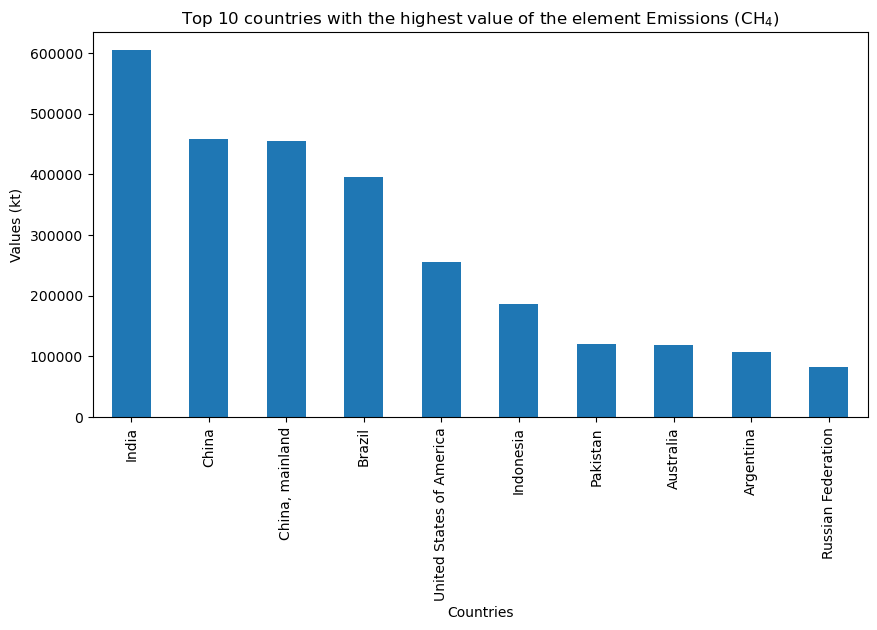

In [54]:
# draw the bar plot with top 10 countries with the highest value of the element 'Emissions (CH4)'

import matplotlib.pyplot as plt
df_ch4 = df[df['Element'] == 'Emissions (CH4)']
df_ch4 = df_ch4.groupby('Area')['Value'].sum().sort_values(ascending=False).head(10)

# plot size
plt.figure(figsize=(10, 5))
df_ch4.plot(kind='bar')
plt.title('Top 10 countries with the highest value of the element Emissions (CH$_4$)')
plt.xlabel('Countries')
plt.ylabel('Values (kt)')
plt.show()


In [55]:
# draw line plot for the element "Emissions (Ch4)" for all the coutries using plotly
import plotly.express as px

df_ch4 = df[df['Element'] == 'Emissions (CH4)']
fig = px.line(df_ch4, x='Year', y='Value', color='Area', title='Emissions (CH<sub>4</sub>) for all the countries')
fig.show()

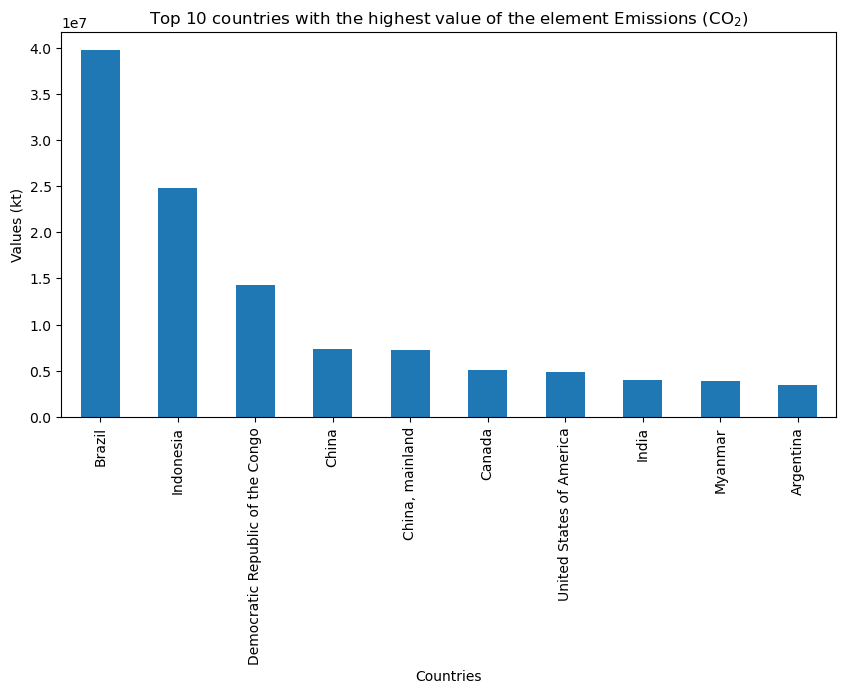

In [56]:
# draw the bar plot with top 10 countries with the highest value of the element 'Emissions (CO2)'

import matplotlib.pyplot as plt
df_co2 = df[df['Element'] == 'Emissions (CO2)']
df_co2 = df_co2.groupby('Area')['Value'].sum().sort_values(ascending=False).head(10)

# plot size
plt.figure(figsize=(10, 5))
df_co2.plot(kind='bar')
plt.title('Top 10 countries with the highest value of the element Emissions (CO$_2$)')
plt.xlabel('Countries')
plt.ylabel('Values (kt)')
plt.show()


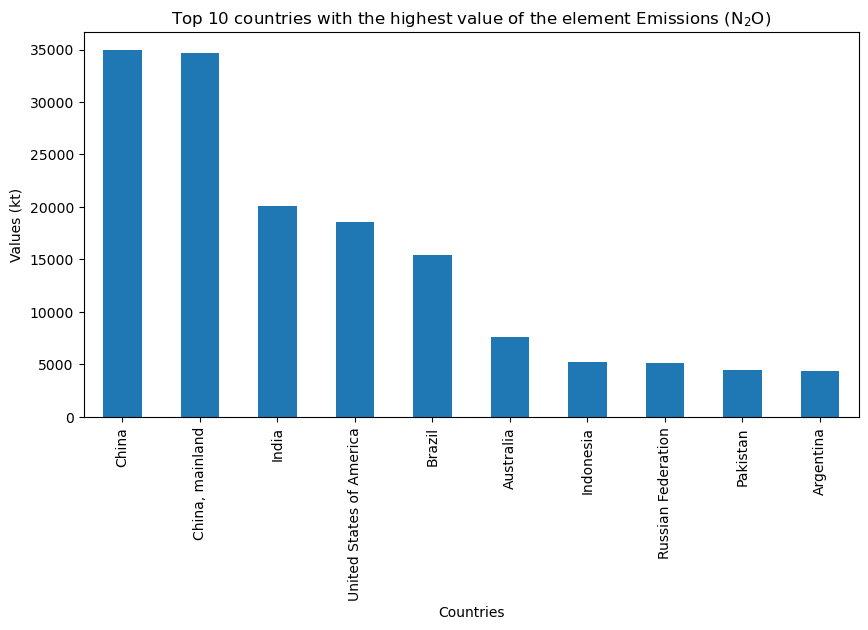

In [57]:
# draw the bar plot with top 10 countries with the highest value of the element 'Emissions (N2O)'
import matplotlib.pyplot as plt
df_n2o = df[df['Element'] == 'Emissions (N2O)']
df_n2o = df_n2o.groupby('Area')['Value'].sum().sort_values(ascending=False).head(10)

# plot size
plt.figure(figsize=(10, 5))
df_n2o.plot(kind='bar')
plt.title('Top 10 countries with the highest value of the element Emissions (N$_2$O)')
plt.xlabel('Countries')
plt.ylabel('Values (kt)')
plt.show()

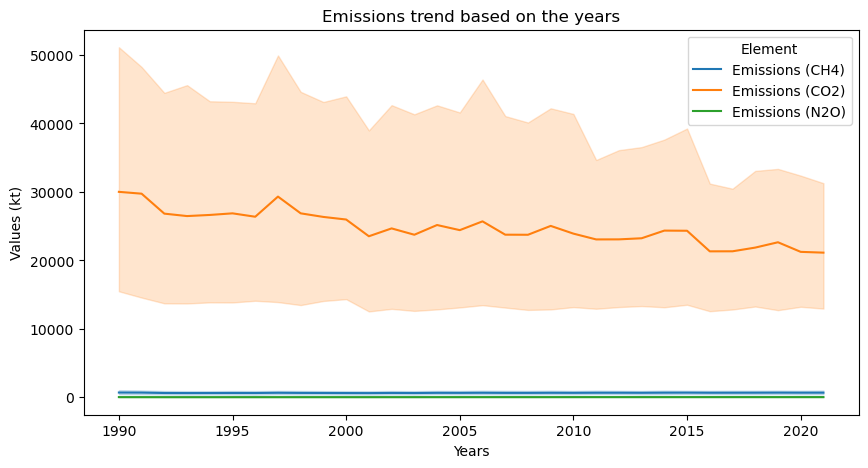

In [58]:
# plot the line plot of the all elements based on the years in the data as a trendline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='Value', hue='Element')
plt.title('Emissions trend based on the years')
plt.xlabel('Years')
plt.ylabel('Values (kt)')
plt.show()

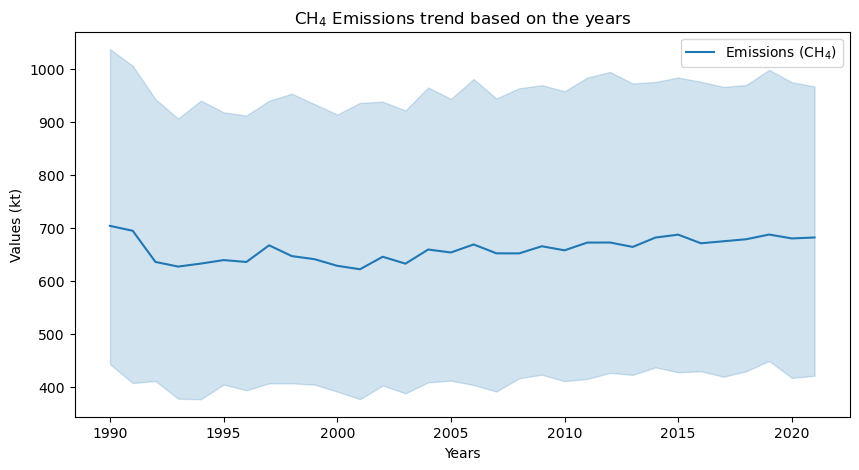

In [59]:
# plot the line plot of the Element "Emission (CH4)" based on the years in the data as a trendline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df_ch4 = df[df['Element'] == 'Emissions (CH4)']
sns.lineplot(data=df_ch4, x='Year', y='Value', hue='Element')
plt.title('CH$_4$ Emissions trend based on the years')
plt.xlabel('Years')
plt.ylabel('Values (kt)')
# name the leguend element
plt.legend(['Emissions (CH$_4$)'])
plt.show()

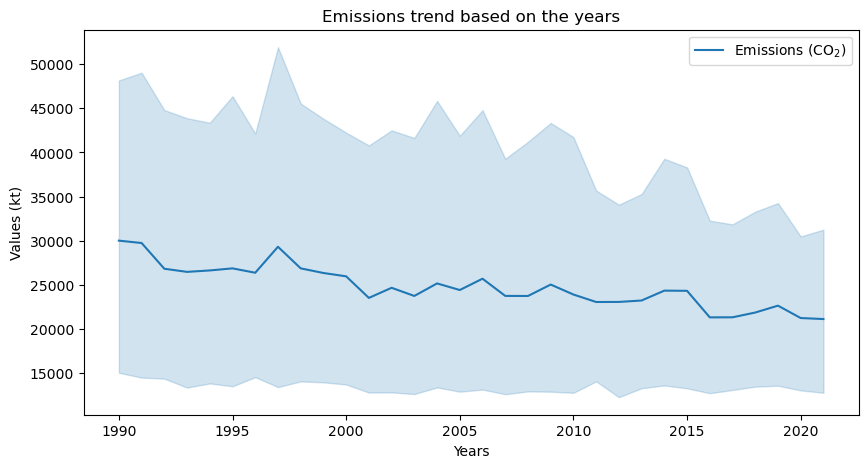

In [60]:
# plot the line plot of the Element "Emission (CO2)" based on the years in the data as a trendline

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df_co2 = df[df['Element'] == 'Emissions (CO2)']
sns.lineplot(data=df_co2, x='Year', y='Value', hue='Element')
plt.title('Emissions trend based on the years')
plt.xlabel('Years')
plt.ylabel('Values (kt)')
plt.legend(['Emissions (CO$_2$)'])
plt.show()

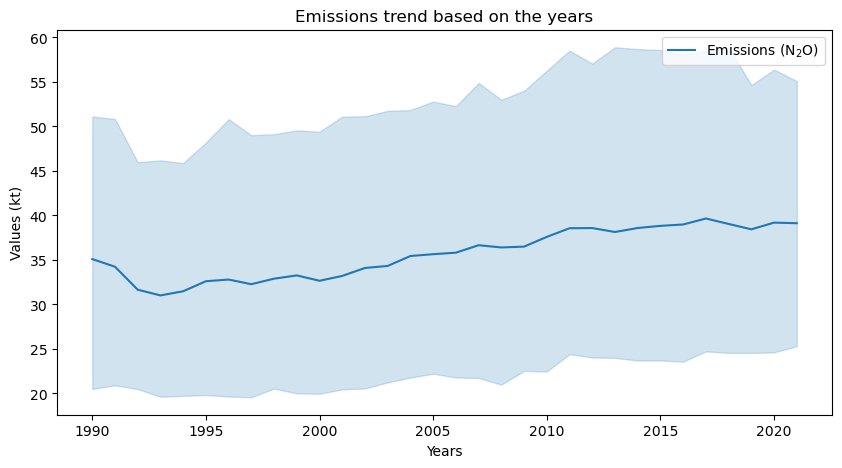

In [61]:
# plot the line plot of the Element "Emission (N2O)" based on the years in the data as a trendline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df_n2o = df[df['Element'] == 'Emissions (N2O)']
sns.lineplot(data=df_n2o, x='Year', y='Value', hue='Element')
plt.title('Emissions trend based on the years')
plt.xlabel('Years')
plt.ylabel('Values (kt)')
plt.legend(['Emissions (N$_2$O)'])
plt.show()

In [62]:
df.isnull().sum()

Area       0
Element    0
Year       0
Value      0
dtype: int64

In [63]:
df.duplicated().sum()

0

> Need to normalize the data because of Data Ranges

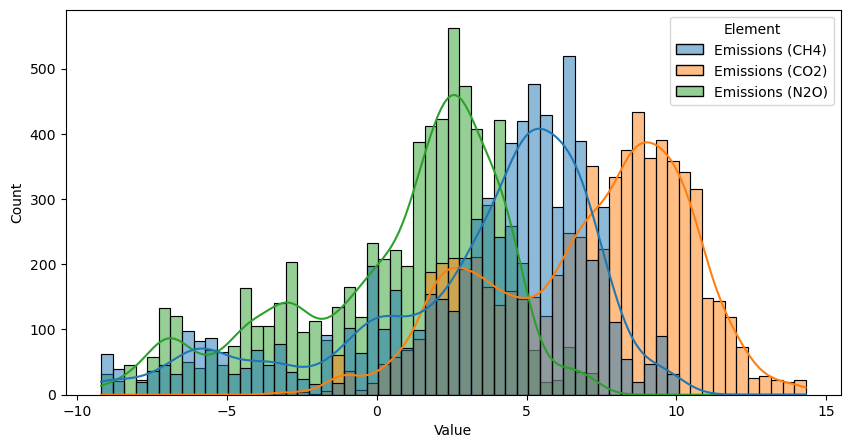

In [64]:
import seaborn as sns
import numpy as np

# plot the distribution plots for all the values in "Element" column one by one based on the Value column using seaborn
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x=np.log(df['Value']), hue='Element', kde=True)

plt.show()

### `Making same plot with plotly for interactive visualization`

In [65]:
import plotly.express as px

#MAKE HISTOGRAMS FOR EACH ELEMENT
fig = px.histogram(df, x=np.log(df['Value']), color='Element')
fig.show()

---

# **`Time Series Analysis of Greenhouse Gases Emission from Agricultural Land`**

## 1. `ARIMA Model` for CO<sub>2</sub> Emission

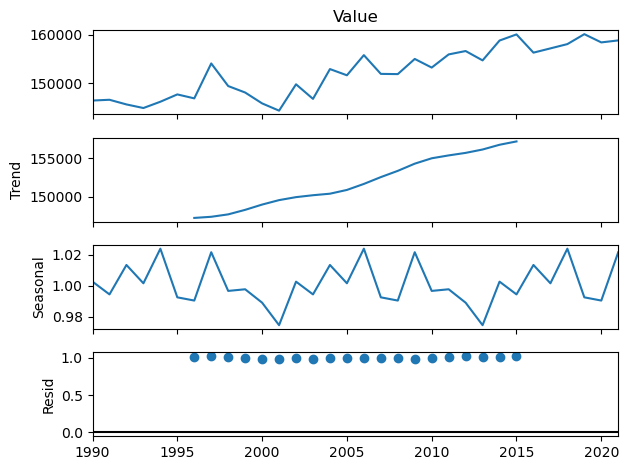

In [66]:
# decompose the time series data for the element "Emissions (CH4)" and plot the trend, seasonal and residual components
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df_ch4 = df[df['Element'] == 'Emissions (CH4)']
df_ch4 = df_ch4.groupby('Year')['Value'].sum()

result = seasonal_decompose(df_ch4, model='multiplicative', period=12)
result.plot()
plt.show()

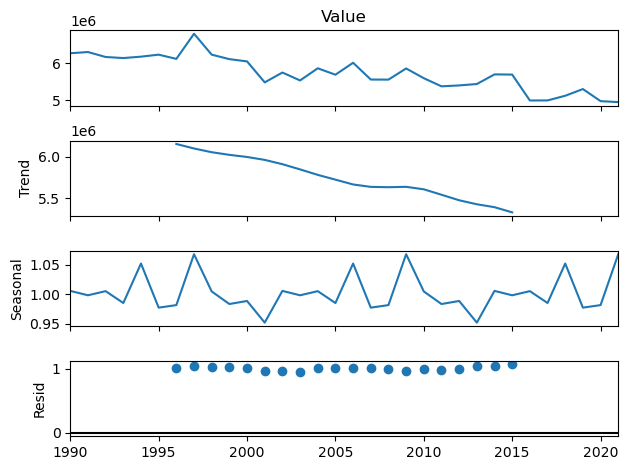

In [67]:
# decompose the time series data for the element "Emissions (CO2)" and plot the trend, seasonal and residual components
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df_co2 = df[df['Element'] == 'Emissions (CO2)']
df_co2 = df_co2.groupby('Year')['Value'].sum()

result = seasonal_decompose(df_co2, model='multiplicative', period=12)
result.plot()
plt.show()

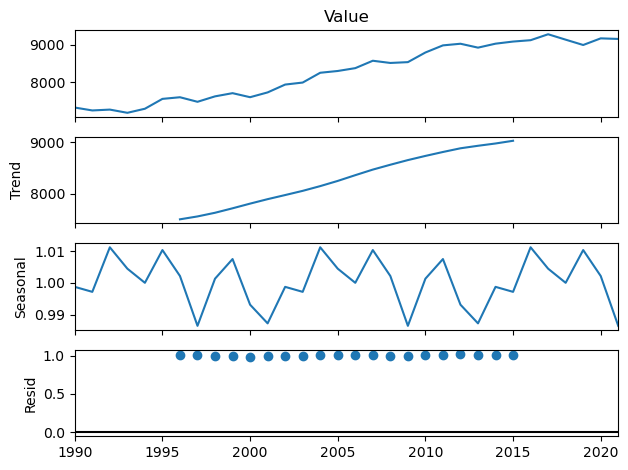

In [68]:
# decompose the time series data for the element "Emissions (N2O)" and plot the trend, seasonal and residual components
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df_n2o = df[df['Element'] == 'Emissions (N2O)']
df_n2o = df_n2o.groupby('Year')['Value'].sum()

result = seasonal_decompose(df_n2o, model='multiplicative', period=12)
result.plot()
plt.show()

Predicted: [157520.61924521], Expected: 156647.6139
Predicted: [159191.61907501], Expected: 154704.4441
Predicted: [152621.22138204], Expected: 158827.1599
Predicted: [158422.93312919], Expected: 160101.4377
Predicted: [158748.51745775], Expected: 156314.28029999998
Predicted: [156708.61690807], Expected: 157197.7545
Predicted: [156907.83381227], Expected: 158088.6123
Predicted: [157279.6699474], Expected: 160153.6795
Predicted: [161763.21805458], Expected: 158440.0257
Predicted: [158589.08399078], Expected: 158854.7752


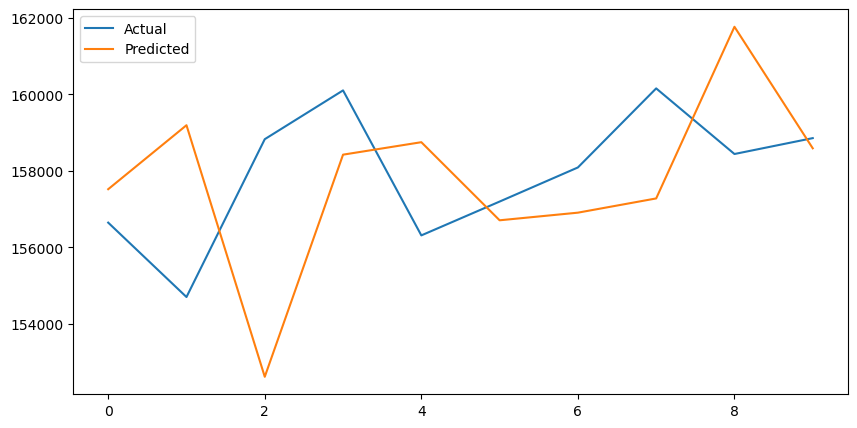

In [69]:
# ARIMA model for the element "Emissions (CH4)"import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
data_array = df_ch4.values


X_train, X_test = data_array[:-10], data_array[-10:] # last 10 values for testing
X_test_orig = X_test # to calculate r2 score later



fcst = [] # to store the forecasted values
for step in range(10): # forecast 10 steps

    mod = ARIMA(X_train, order=(4,1,4))
    res = mod.fit()
    fcst.append(res.forecast(steps=1))
    X_train = np.append(X_train, X_test[step])
    print(f'Predicted: {fcst[step]}, Expected: {X_test[step]}')
    
r2_score(X_test_orig, fcst) # r2 score

# plot
plt.figure(figsize=(10, 5))
plt.plot(X_test_orig, label='Actual')
plt.plot(fcst, label='Predicted')
plt.legend()
plt.show()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10899D+01    |proj g|=  1.53969D+01

At iterate    5    f=  1.05134D+01    |proj g|=  2.96732D+00

At iterate   10    f=  1.01228D+01    |proj g|=  3.34226D+00

At iterate   15    f=  1.00561D+01    |proj g|=  5.97600D-01

At iterate   20    f=  9.94257D+00    |proj g|=  3.56589D+00

At iterate   25    f=  9.86017D+00    |proj g|=  1.68734D-01

At iterate   30    f=  9.85381D+00    |proj g|=  4.77178D-01

At iterate   35    f=  9.80535D+00    |proj g|=  4.85025D+00

At iterate   40    f=  9.78156D+00    |proj g|=  1.44023D+00

At iterate   45    f=  9.77689D+00    |proj g|=  5.37491D-01

At iterate   50    f=  9.77561D+00    |proj g|=  8.29138D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   30    f=  8.83848D+00    |proj g|=  1.19012D+00

At iterate   35    f=  8.65025D+00    |proj g|=  9.37244D+00

At iterate   40    f=  8.61437D+00    |proj g|=  2.75616D-01

At iterate   45    f=  8.61253D+00    |proj g|=  4.02420D-02

At iterate   50    f=  8.61249D+00    |proj g|=  2.68406D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     77      2     0     0   2.684D-01   8.612D+00
  F =   8.6124896502942505     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Predicted: [160016.98181721], Expected: 154704.4441
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f=  9.70100D+00    |proj g|=  9.12153D-01

At iterate   10    f=  9.69265D+00    |proj g|=  4.79936D-01

At iterate   15    f=  9.32167D+00    |proj g|=  4.95841D+00

At iterate   20    f=  9.18264D+00    |proj g|=  1.05813D+00

At iterate   25    f=  8.92029D+00    |proj g|=  6.57944D+00

At iterate   30    f=  8.82948D+00    |proj g|=  8.12878D-01

At iterate   35    f=  8.79739D+00    |proj g|=  8.52966D+00

At iterate   40    f=  8.75650D+00    |proj g|=  3.14746D+00

At iterate   45    f=  8.73547D+00    |proj g|=  3.41099D+00

At iterate   50    f=  8.72334D+00    |proj g|=  5.09090D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   30    f=  9.24086D+00    |proj g|=  9.94490D-02

At iterate   35    f=  9.23833D+00    |proj g|=  7.63732D-01

At iterate   40    f=  9.22700D+00    |proj g|=  5.91964D-01

At iterate   45    f=  9.21700D+00    |proj g|=  5.01418D-01

At iterate   50    f=  9.21606D+00    |proj g|=  6.52038D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     63      1     0     0   6.520D-01   9.216D+00
  F =   9.2160587383168213     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Predicted: [158324.99684751], Expected: 160101.4377
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate   15    f=  8.99948D+00    |proj g|=  8.29085D-01

At iterate   20    f=  8.98260D+00    |proj g|=  8.53874D-01

At iterate   25    f=  8.95227D+00    |proj g|=  1.92719D+00

At iterate   30    f=  8.92940D+00    |proj g|=  6.14549D-01

At iterate   35    f=  8.92894D+00    |proj g|=  1.03609D-01

At iterate   40    f=  8.92712D+00    |proj g|=  1.30087D-01

At iterate   45    f=  8.92445D+00    |proj g|=  1.09774D-01

At iterate   50    f=  8.92149D+00    |proj g|=  4.42522D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     56      1     0     0   4.425D-01   8.921D+00
  F =   8.92149236880

 This problem is unconstrained.



At iterate   10    f=  9.12416D+00    |proj g|=  1.53973D+00

At iterate   15    f=  9.05242D+00    |proj g|=  6.20551D-01

At iterate   20    f=  9.02878D+00    |proj g|=  6.52570D-01

At iterate   25    f=  8.98084D+00    |proj g|=  2.36293D+00

At iterate   30    f=  8.96718D+00    |proj g|=  9.62121D-01

At iterate   35    f=  8.96193D+00    |proj g|=  2.74309D-01

At iterate   40    f=  8.96088D+00    |proj g|=  8.74664D-02

At iterate   45    f=  8.95128D+00    |proj g|=  1.02303D+00

At iterate   50    f=  8.93283D+00    |proj g|=  3.08392D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     66   

 This problem is unconstrained.



At iterate   40    f=  8.93917D+00    |proj g|=  4.26010D-02

At iterate   45    f=  8.93896D+00    |proj g|=  6.40824D-02

At iterate   50    f=  8.93845D+00    |proj g|=  1.01742D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     59      1     0     0   1.017D-01   8.938D+00
  F =   8.9384484632129766     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Predicted: [158085.68764536], Expected: 158088.6123
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate   25    f=  8.94649D+00    |proj g|=  5.16166D-01

At iterate   30    f=  8.93869D+00    |proj g|=  2.36425D-01

At iterate   35    f=  8.93735D+00    |proj g|=  4.73308D-01

At iterate   40    f=  8.93412D+00    |proj g|=  9.69967D-02

At iterate   45    f=  8.93398D+00    |proj g|=  3.70205D-02

At iterate   50    f=  8.93306D+00    |proj g|=  4.12204D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     60      1     0     0   4.122D-01   8.933D+00
  F =   8.9330579615616426     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Predicted: [157101.19446033], Expected: 160153.6795

 This problem is unconstrained.



At iterate   15    f=  9.06477D+00    |proj g|=  5.70887D-01

At iterate   20    f=  9.02697D+00    |proj g|=  1.86608D+00

At iterate   25    f=  8.99117D+00    |proj g|=  1.28117D+00

At iterate   30    f=  8.98494D+00    |proj g|=  2.78762D-01

At iterate   35    f=  8.98446D+00    |proj g|=  9.32051D-02

At iterate   40    f=  8.98374D+00    |proj g|=  3.54239D-01

At iterate   45    f=  8.98187D+00    |proj g|=  2.55966D-01

At iterate   50    f=  8.98154D+00    |proj g|=  8.78745D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57      1     0     0   8.787D-02   8.982D+00
  F =   8.98154376635

 This problem is unconstrained.



At iterate    5    f=  9.32598D+00    |proj g|=  1.30351D+00

At iterate   10    f=  9.16472D+00    |proj g|=  1.65370D+00

At iterate   15    f=  9.09698D+00    |proj g|=  4.13371D-01

At iterate   20    f=  9.04527D+00    |proj g|=  1.88052D+00

At iterate   25    f=  9.02106D+00    |proj g|=  2.86179D-01

At iterate   30    f=  9.02006D+00    |proj g|=  1.34848D-01

At iterate   35    f=  9.01978D+00    |proj g|=  1.43752D-01

At iterate   40    f=  9.01913D+00    |proj g|=  2.54752D-02

At iterate   45    f=  9.01294D+00    |proj g|=  1.37454D+00

At iterate   50    f=  9.00649D+00    |proj g|=  9.06303D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

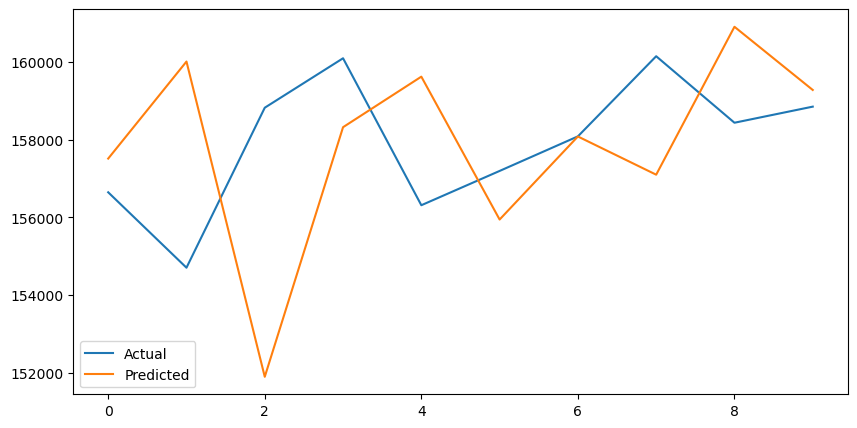

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

# SARIMA model for the element "Emissions (CH4)"

data_array = df_ch4.values

X_train, X_test = data_array[:-10], data_array[-10:] # last 10 values for testing
X_test_orig = X_test # to calculate r2 score later

fcst = [] # to store the forecasted values
for step in range(10): # forecast 10 steps
    mod = SARIMAX(X_train, order=(4, 1, 4), seasonal_order=(1, 0, 1, 12))
    res = mod.fit()
    fcst.append(res.forecast(steps=1))
    X_train = np.append(X_train, X_test[step])
    print(f'Predicted: {fcst[step]}, Expected: {X_test[step]}')

print(r2_score(X_test_orig, fcst)) # r2 score

# plot
plt.figure(figsize=(10, 5))
plt.plot(X_test_orig, label='Actual')
plt.plot(fcst, label='Predicted')
plt.legend()
plt.show()


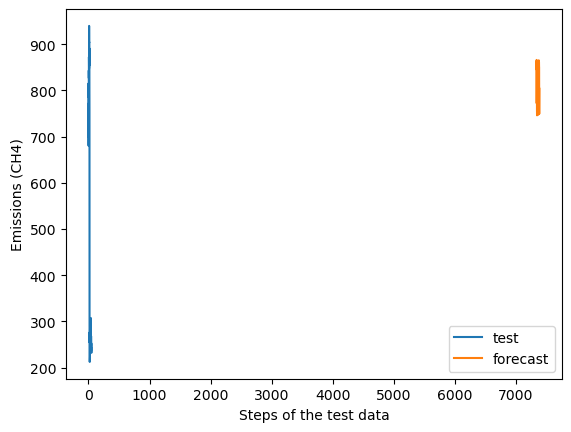

-1.7796961199507946

In [71]:
import statsmodels.api as sm

train = df[df['Element'] == 'Emissions (CH4)']['Value'][:-50]
test = df[df['Element'] == 'Emissions (CH4)']['Value'][-50:]

mod = sm.tsa.statespace.SARIMAX(
    endog=train,
    exog=None,
    order=(0, 1, 1),
    seasonal_order=(1, 1, 1, 12),
)
res = mod.fit(disp=False)
fcst = res.forecast(steps=50)

plt.plot(test.values)
plt.plot(fcst)
plt.xlabel('Steps of the test data')
plt.ylabel('Emissions (CH4)')
plt.legend(['test', 'forecast'])
plt.show()
r2_score(test.values, fcst)

## `LSTM Model` for CH<sub>4</sub> Emission

2025-02-06 12:26:07.588511: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-02-06 12:26:07.588532: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2025-02-06 12:26:07.588537: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2025-02-06 12:26:07.588587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-06 12:26:07.588620: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 5, 32)             12416     
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 32465 (126.82 KB)
Trainable params: 32465 (126.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200


2025-02-06 12:26:10.884595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 9s 475ms/step - loss: 0.1443 - mean_squared_error: 0.1443 - val_loss: 0.2631 - val_mean_squared_error: 0.2631
Epoch 2/200
8/8 [==============================] - 0s 20ms/step - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.1094 - val_mean_squared_error: 0.1094
Epoch 3/200
8/8 [==============================] - 0s 21ms/step - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 4/200
8/8 [==============================] - 0s 20ms/step - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 5/200
8/8 [==============================] - 0s 21ms/step - loss: 0.0528 - mean_squared_error: 0.0528 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 6/200
8/8 [==============================] - 0s 21ms/step - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 7/200
8/8 [==============================] - 

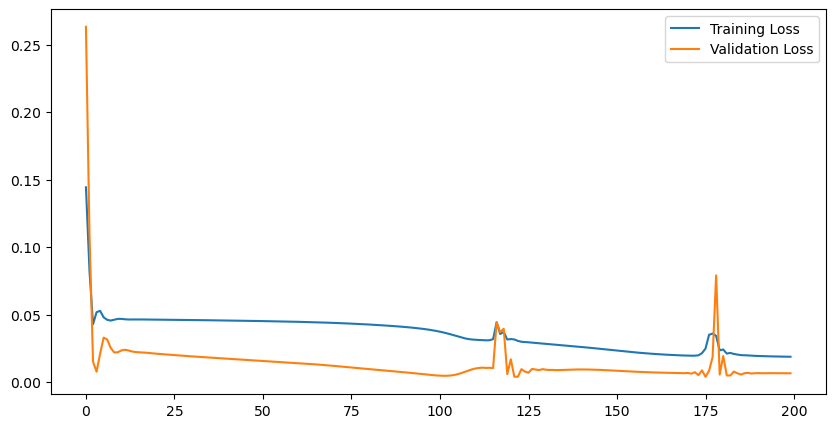

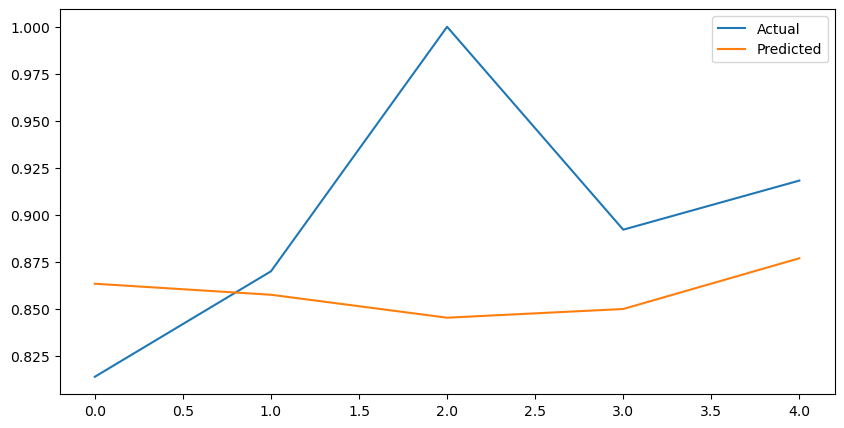

In [72]:
# LSTM model to forecast the element "Emissions (CH4)"
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# data preparation
data = df[df['Element'] == 'Emissions (CH4)']
data = data.groupby('Year')['Value'].sum().values

scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# split the data
train = data[:-10]
test = data[-10:]

# create the dataset
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5
X_train, y_train = create_dataset(train, train, TIME_STEPS)
X_test, y_test = create_dataset(test, test, TIME_STEPS)

# build the model
model = Sequential()
model.add(LSTM(units=64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# another layer of lstm
model.add(LSTM(units=32, activation='tanh', return_sequences=True))
model.add(LSTM(units=16, activation='tanh'))
model.add(Dense(1))

model.summary()

model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error'])

model_history = model.fit(
            X_train, y_train,
            validation_split=0.1,
            epochs=200,
            batch_size=2,
            shuffle=False,
            verbose=1
)

# forecast
fcst = model.predict(X_test)

# r2 score
r2_score(y_test, fcst)

# plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


# plot
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(fcst, label='Predicted')
plt.legend()
plt.show()

## `GRU Model` for CH<sub>4</sub> Emission

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 64)             12864     
                                                                 
 gru_1 (GRU)                 (None, 5, 32)             9408      
                                                                 
 gru_2 (GRU)                 (None, 16)                2400      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 24689 (96.44 KB)
Trainable params: 24689 (96.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
8/8 [==============================] - 6s 330ms/step - loss: 0.0976 - root_mean_squared_error: 0.3125 - val_loss: 0.0532 - val_root_mean_s

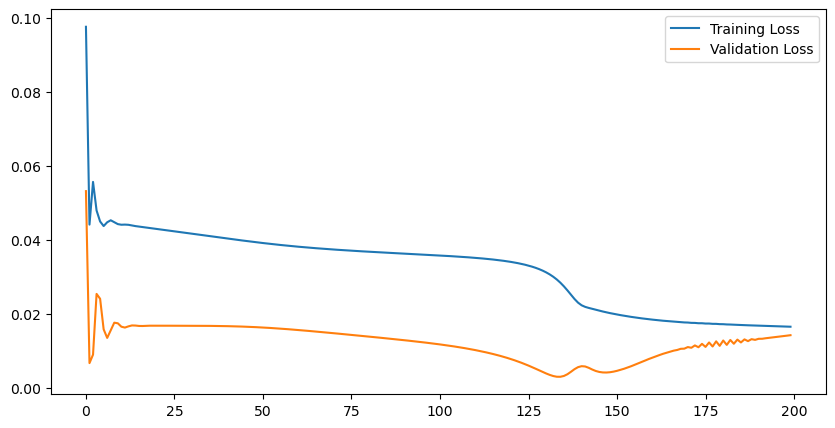

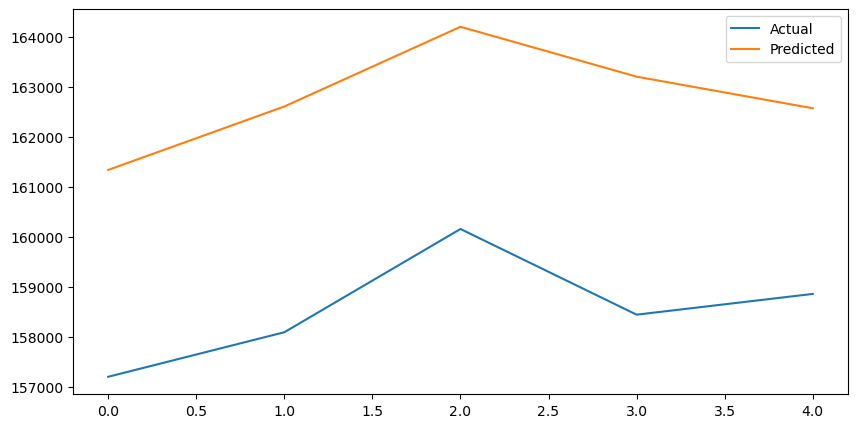

In [73]:
# use GRU for the element "Emissions (CH4)" and forecast the values
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

# data preparation
data = df[df['Element'] == 'Emissions (CH4)']
data = data.groupby('Year')['Value'].sum().values

scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# split the data
train = data[:-10]
test = data[-10:]

# create the dataset
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5
X_train, y_train = create_dataset(train, train, TIME_STEPS)
X_test, y_test = create_dataset(test, test, TIME_STEPS)

# build the model
model = Sequential()
model.add(GRU(units=64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))    
model.add(GRU(units=32, activation='tanh', return_sequences=True))
model.add(GRU(units=16, activation='tanh'))
model.add(Dense(1))

model.summary()

model.compile(loss='mean_squared_error',optimizer='adam', metrics=[RootMeanSquaredError()])

callbacks = [EarlyStopping(monitor='val_loss', patience=10)]

model_history = model.fit(
            X_train, y_train,
            validation_split=0.1,
            epochs=200,
            batch_size=2,
            shuffle=False,
            verbose=1,
            # callbacks=callbacks
)

# forecast
fcst = model.predict(X_test)

# inverse transform
fcst = scaler.inverse_transform(fcst)
y_test = scaler.inverse_transform(y_test)

# r2 score
print(r2_score(y_test, fcst))

# plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# plot
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(fcst, label='Predicted')
plt.legend()
plt.show()

## `Ensemble Models` for CH<sub>4</sub> Emission
1. Random Forest
2. XGBoost

Fitting 3 folds for each of 180 candidates, totalling 540 fits


/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total t

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total t

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total t

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total t

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total 

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total ti

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total ti

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total t

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total ti

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total ti

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total 

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total ti

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total ti

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total ti

/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/aammar/mambaforge/envs/tf_env/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y wa

[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total t

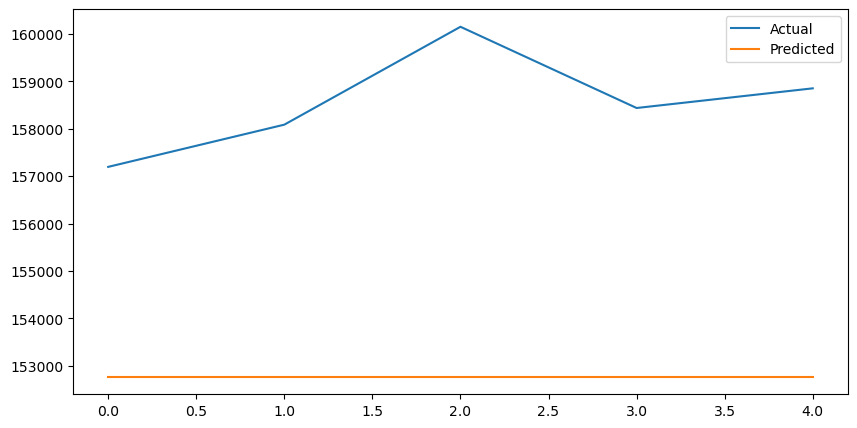

In [74]:
# use Random forest model to forecast the element "Emissions (CH4)"
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

data = df[df['Element'] == 'Emissions (CH4)']
data = data.groupby('Year')['Value'].sum().values

# scale the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

X_train, X_test = data[:-10], data[-10:] # last 10 values for testing
X_test_orig = X_test # to calculate r2 score later

# create the dataset
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5
X_train, y_train = create_dataset(X_train, X_train, TIME_STEPS)
X_test, y_test = create_dataset(X_test, X_test, TIME_STEPS)

# reshape the input data to have 2 dimensions
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

# define the hyperparameters ranges and use gridsearchCV to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# best hyperparameters
print(grid_search.best_params_)

# forecast
fcst = grid_search.predict(X_test)

# inverse transform
fcst = scaler.inverse_transform(fcst.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# r2 score
print(r2_score(y_test, fcst))

# plot
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(fcst, label='Predicted')
plt.legend()
plt.show()

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END ..max_depth=10, min_child_weight=1, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, min_child_weight=1, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, min_child_weight=2, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, min_child_weight=2, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, min_child_weight=2, n_estimators=50; total time=   0.0s
[CV] END .max_depth=10, min_child_weight=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=10, min_child_weight=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=150; total time=   0.0s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END .max_depth=10, min_child_weight=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=10, min_child_weight=2, n_estimators=150; total time=   0.0s
[CV] END .max_depth=10, min_child_weight=2, n_e

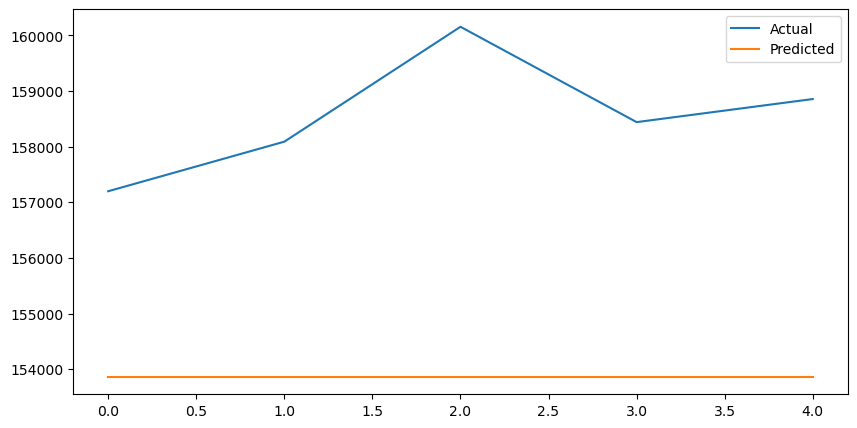

In [75]:
# use XGBoost model to forecast the element "Emissions (CH4)"
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

data = df[df['Element'] == 'Emissions (CH4)']
data = data.groupby('Year')['Value'].sum().values

# scale the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# split the data using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(data):
    X_train, X_test = data[train_index], data[test_index]
    
X_train, X_test = data[:-10], data[-10:] # last 10 values for testing
X_test_orig = X_test # to calculate r2 score later

# create the dataset
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5

X_train, y_train = create_dataset(X_train, X_train, TIME_STEPS)
X_test, y_test = create_dataset(X_test, X_test, TIME_STEPS)

# reshape the input data to have 2 dimensions
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

# define the hyperparameters ranges and use gridsearchCV to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40, 50],
    'min_child_weight': [1, 2, 3, 4]
}

model = XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# best hyperparameters
print(grid_search.best_params_)

# forecast
fcst = grid_search.predict(X_test)

# inverse transform
fcst = scaler.inverse_transform(fcst.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# r2 score
print(r2_score(y_test, fcst))

# plot
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(fcst, label='Predicted')
plt.legend()
plt.show()

## `Prophet Model` for CH4 Emission


12:27:27 - cmdstanpy - INFO - Chain [1] start processing
12:27:27 - cmdstanpy - INFO - Chain [1] done processing


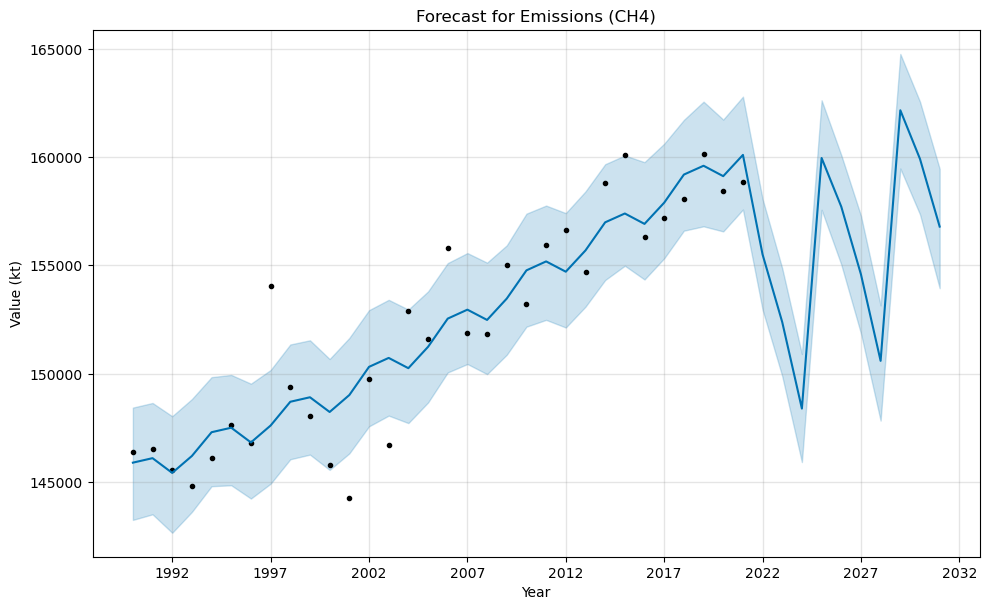

R2 Score: 0.8324633829018123
Mean Squared Error: 4259144.249674581
Mean Absolute Error: 1492.089035094098
Root Mean Squared Error: 2063.769427449341


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming df is your dataframe and it has already been read from your data source
data = df[df['Element'] == 'Emissions (CH4)']
data = data.groupby('Year')['Value'].sum().reset_index()

# Prepare the data for Prophet
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'], format='%Y')

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Forecast
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Forecast for Emissions (CH4)')
plt.xlabel('Year')
plt.ylabel('Value (kt)')
plt.show()

# print metrics
r2 = r2_score(data['y'], forecast['yhat'][:-10])
mse = mean_squared_error(data['y'], forecast['yhat'][:-10])
mae = mean_absolute_error(data['y'], forecast['yhat'][:-10])

print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')

12:27:28 - cmdstanpy - INFO - Chain [1] start processing
12:27:28 - cmdstanpy - INFO - Chain [1] done processing


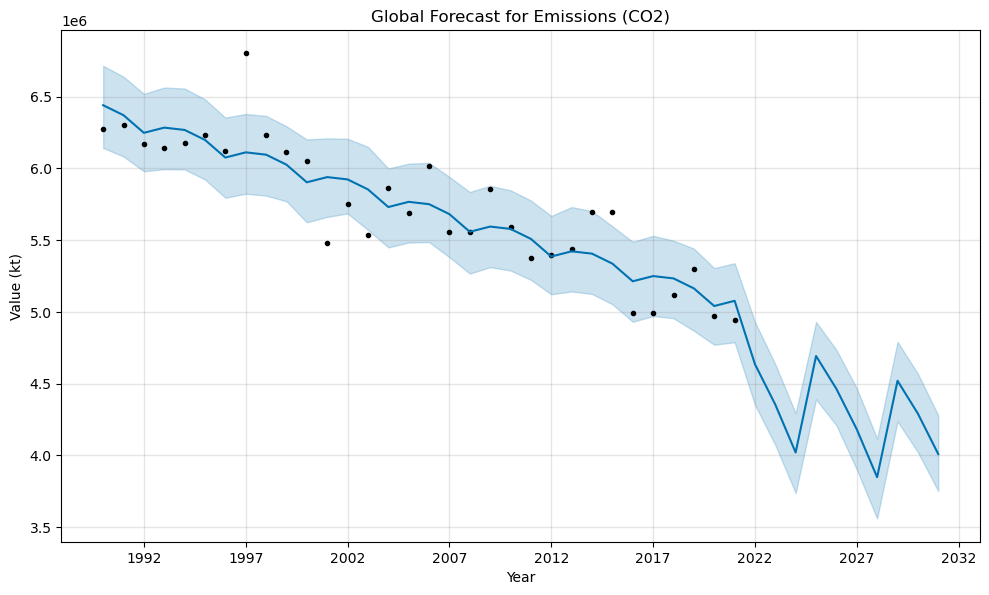

R2 Score: 0.7739919734302827
Mean Squared Error: 47430933869.5309
Mean Absolute Error: 164464.06103955078
Root Mean Squared Error: 217786.44096805222


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming df is your dataframe and it has already been read from your data source
data = df[df['Element'] == 'Emissions (CO2)']
data = data.groupby('Year')['Value'].sum().reset_index()

# Prepare the data for Prophet
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'], format='%Y')

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Forecast
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Global Forecast for Emissions (CO2)')
plt.xlabel('Year')
plt.ylabel('Value (kt)')
plt.show()

#print metrics
r2 = r2_score(data['y'], forecast['yhat'][:-10])
mse = mean_squared_error(data['y'], forecast['yhat'][:-10])
mae = mean_absolute_error(data['y'], forecast['yhat'][:-10])

print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')

12:27:28 - cmdstanpy - INFO - Chain [1] start processing
12:27:28 - cmdstanpy - INFO - Chain [1] done processing


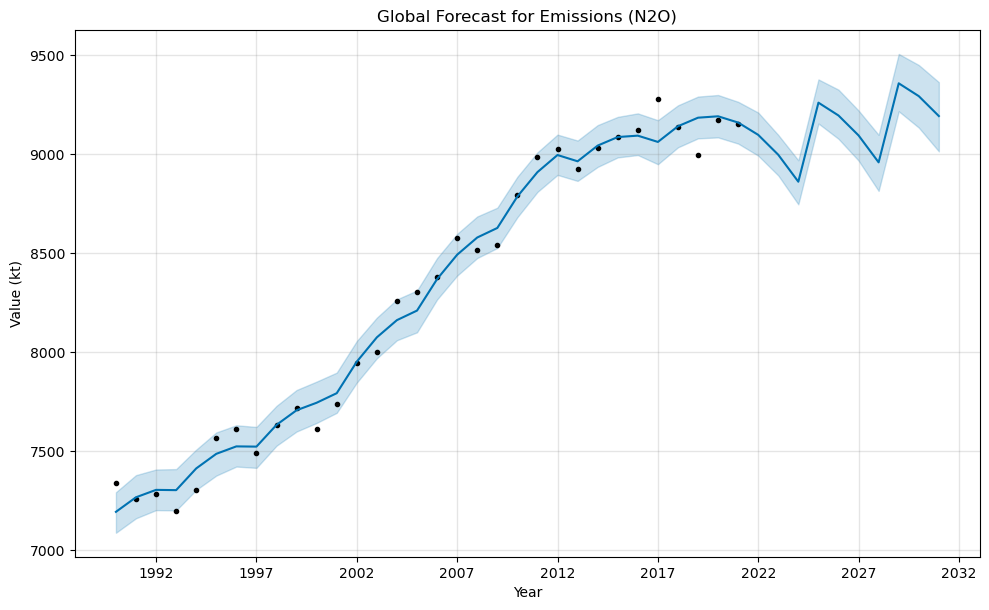

R2 Score: 0.9865094409804276
Mean Squared Error: 6751.710853516001
Mean Absolute Error: 60.730738865989736
Root Mean Squared Error: 82.16879488903315


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming df is your dataframe and it has already been read from your data source
data = df[df['Element'] == 'Emissions (N2O)']
data = data.groupby('Year')['Value'].sum().reset_index()

# Prepare the data for Prophet
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'], format='%Y')

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Forecast
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Global Forecast for Emissions (N2O)')
plt.xlabel('Year')
plt.ylabel('Value (kt)')
plt.show()

# print metrics
r2 = r2_score(data['y'], forecast['yhat'][:-10])
mse = mean_squared_error(data['y'], forecast['yhat'][:-10])
mae = mean_absolute_error(data['y'], forecast['yhat'][:-10])

print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')

12:27:28 - cmdstanpy - INFO - Chain [1] start processing
12:27:29 - cmdstanpy - INFO - Chain [1] done processing


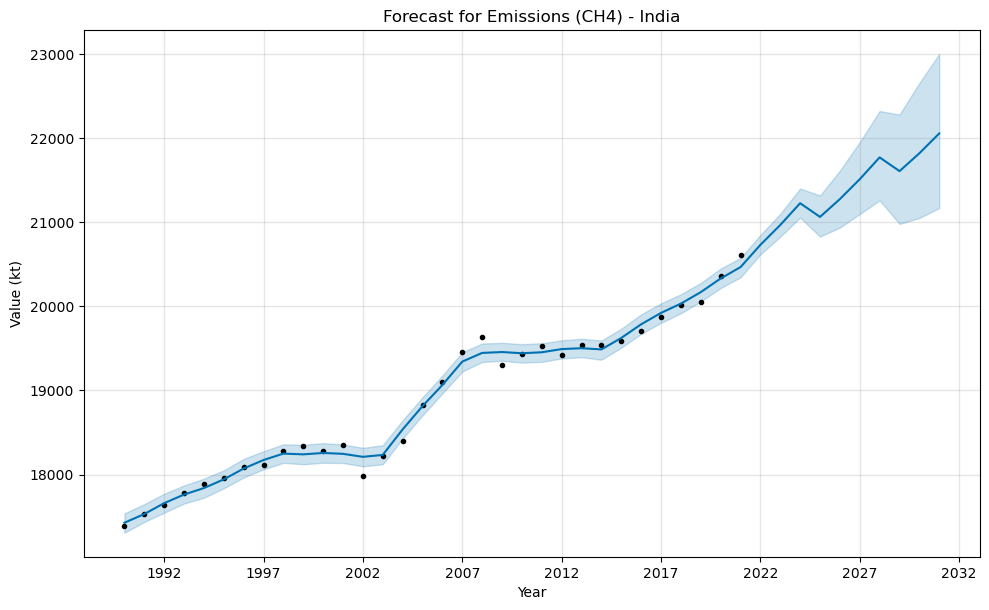

R2 Score: 0.990682073651196
Mean Squared Error: 7492.03875356358
Mean Absolute Error: 65.0677318218925
Root Mean Squared Error: 86.55656389646934


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming df is your dataframe and it has already been read from your data source
data = df[(df['Element'] == 'Emissions (CH4)') & (df['Area'] == 'India')]
data = data.groupby('Year')['Value'].sum().reset_index()

# Prepare the data for Prophet
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'], format='%Y')

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Forecast
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Forecast for Emissions (CH4) - India')
plt.xlabel('Year')
plt.ylabel('Value (kt)')
plt.show()

# print metrics
r2 = r2_score(data['y'], forecast['yhat'][:-10])
mse = mean_squared_error(data['y'], forecast['yhat'][:-10])
mae = mean_absolute_error(data['y'], forecast['yhat'][:-10])

print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')

12:27:29 - cmdstanpy - INFO - Chain [1] start processing
12:27:29 - cmdstanpy - INFO - Chain [1] done processing


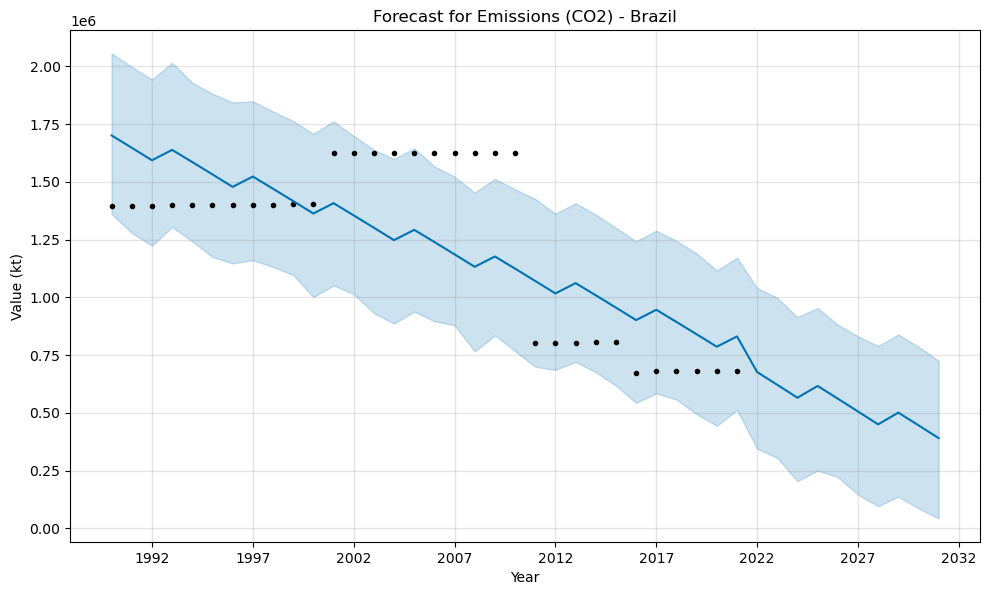

R2 Score: 0.49595122810851233
Mean Squared Error: 72366558215.2462
Mean Absolute Error: 238269.14582795106
Root Mean Squared Error: 269010.3310567202


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming df is your dataframe and it has already been read from your data source
data = df[(df['Element'] == 'Emissions (CO2)') & (df['Area'] == 'Brazil')]
data = data.groupby('Year')['Value'].sum().reset_index()

# Prepare the data for Prophet
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'], format='%Y')

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Forecast
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Forecast for Emissions (CO2) - Brazil')
plt.xlabel('Year')
plt.ylabel('Value (kt)')
plt.show()

# print metrics
r2 = r2_score(data['y'], forecast['yhat'][:-10])
mse = mean_squared_error(data['y'], forecast['yhat'][:-10])
mae = mean_absolute_error(data['y'], forecast['yhat'][:-10])

print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')

12:27:29 - cmdstanpy - INFO - Chain [1] start processing
12:27:29 - cmdstanpy - INFO - Chain [1] done processing


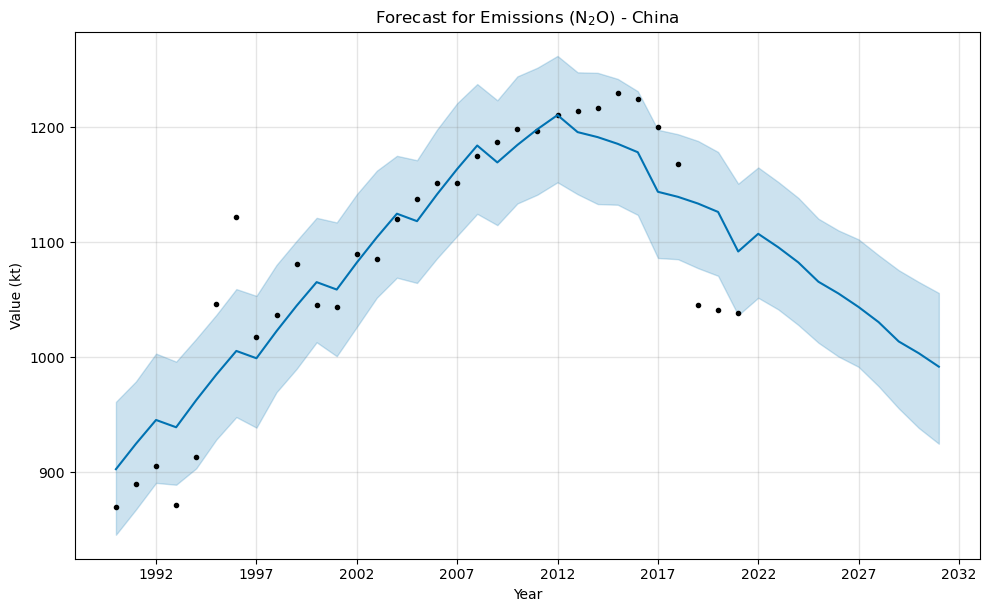

R2 Score: 0.8417058637734205
Mean Squared Error: 1865.4285573886996
Mean Absolute Error: 33.46559901454472
Root Mean Squared Error: 43.19060728200866


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming df is your dataframe and it has already been read from your data source
data = df[(df['Element'] == 'Emissions (N2O)') & (df['Area'] == 'China')]
data = data.groupby('Year')['Value'].sum().reset_index()

# Prepare the data for Prophet
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'], format='%Y')

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Forecast
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Forecast for Emissions (N$_2$O) - China')
plt.xlabel('Year')
plt.ylabel('Value (kt)')
plt.show()

# print metrics
r2 = r2_score(data['y'], forecast['yhat'][:-10])
mse = mean_squared_error(data['y'], forecast['yhat'][:-10])
mae = mean_absolute_error(data['y'], forecast['yhat'][:-10])


print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')

# **Summary of Findings**
- The dataset contains greenhouse gas emissions data from **1990 to 2019**.
- **CO<sub>2</sub> emissions show an increasing trend**, while **CH<sub>4</sub> and N<sub>2</sub>O have fluctuating patterns**.
- Our time series model predicts a **continued rise in emissions**, emphasizing the need for urgent policy interventions.
- Governments and policymakers should **promote sustainable agricultural practices** to mitigate emissions.

## Presentation Slides

- [Download the Presentation Slides](../4_Presentation/presentation_Time%20Series%20Analysis%20of%20Agricultural%20Data_Muhammad%20A%20Tufail.pdf)

---


<h1 style="font-family: 'poppins'; font-weight: bold; color: Orange;">👨‍💻Author: </h1>
<h2 style="font-family: 'poppins'; font-weight: bold; color: Orange;">Dr. Muhammad Aamamr Tufail</h2>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/AammarTufail) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/muhammadaammartufail) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/dr-muhammad-aammar-tufail-02471213b/)  

[![YouTube](https://img.shields.io/badge/YouTube-Profile-red?style=for-the-badge&logo=youtube)](https://www.youtube.com/@codanics) 
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:aammar@codanics.com)

---